In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("USArrests.csv", index_col = 0)

In [3]:
data

Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        67  27.8
Massachusetts      4.4      149        85  16.3
Michigan          12.1      255        74  35.1
Minnesota          2.7       72        66  14.9
Mississippi       16.1      259        44  17.1
Missouri           9.0      178        70  28.2
Montana            6.0      109        53  16.4
Nebraska           4.3      102        62  16.5
Nevada            12.2      252        81  46.0
New Hampshire      2.1       57        56   9.5
New Jersey         7.4      159        89  18.8
New Mexico        11.4      285        70  32.1
New York          11.1      254        86  26.1
North Carolina    13.0      337        45  16.1
North Dakota       0.8       45        44   7.3
Ohio               7.3      120        75  21.4
Oklahoma           6.6      151        68  20.0
Oregon             4.9      159        67  29.3
Pennsylvania       6.3      106        72  14.9
Rhode Island       3.4      174        87   8.3
South Carolina    14.4      279        48  22.5
South Dakota       3.8       86        45  12.8
Tennessee         13.2      188        59  26.9
Texas             12.7      201        80  25.5
Utah               3.2      120        80  22.9
Vermont            2.2       48        32  11.2
Virginia           8.5      156        63  20.7
Washington         4.0      145        73  26.2
West Virginia      5.7       81        39   9.3
Wisconsin          2.6       53        66  10.8
Wyoming            6.8      161        60  15.6

In [4]:
data.shape

(50, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

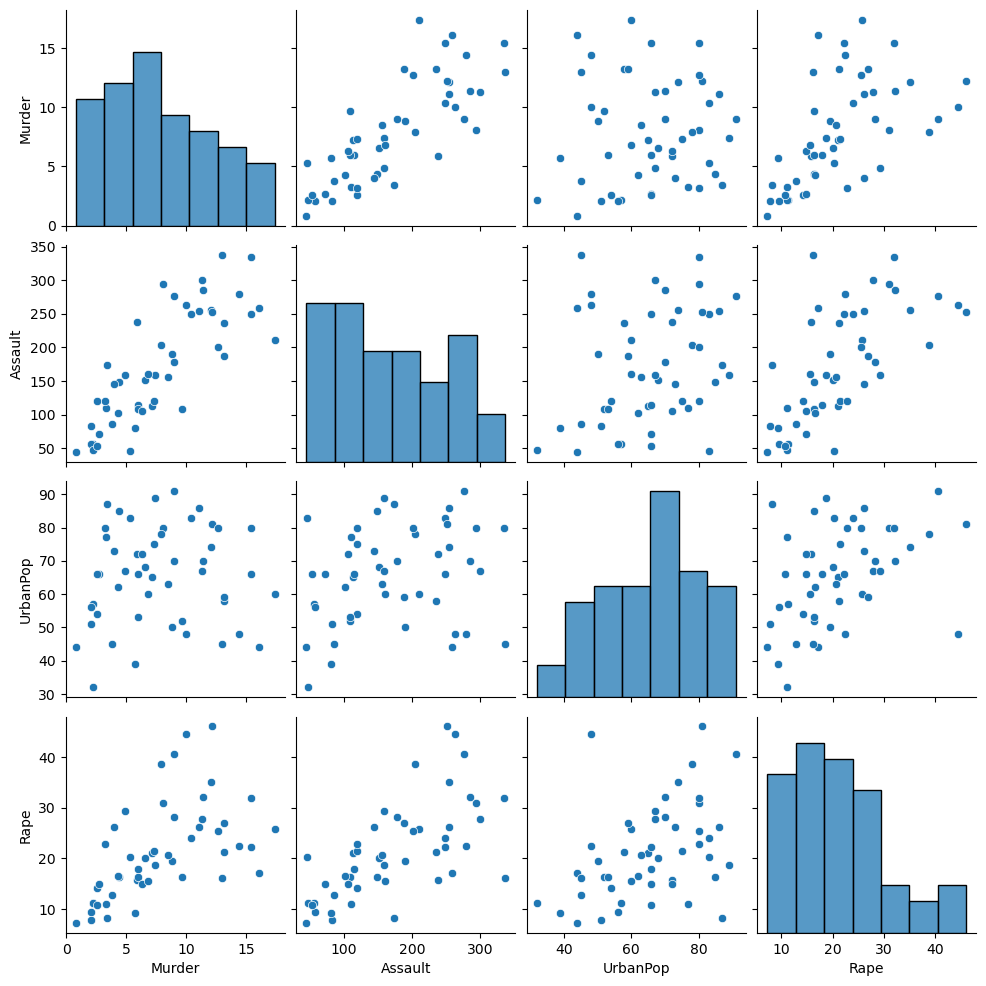

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
x = data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [12]:
kmeans.fit(x)

KMeans(n_clusters=6, random_state=42)

In [13]:
kmeans.inertia_

44.259807638112314

In [14]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6)
y_agg = agg.fit_predict(x)

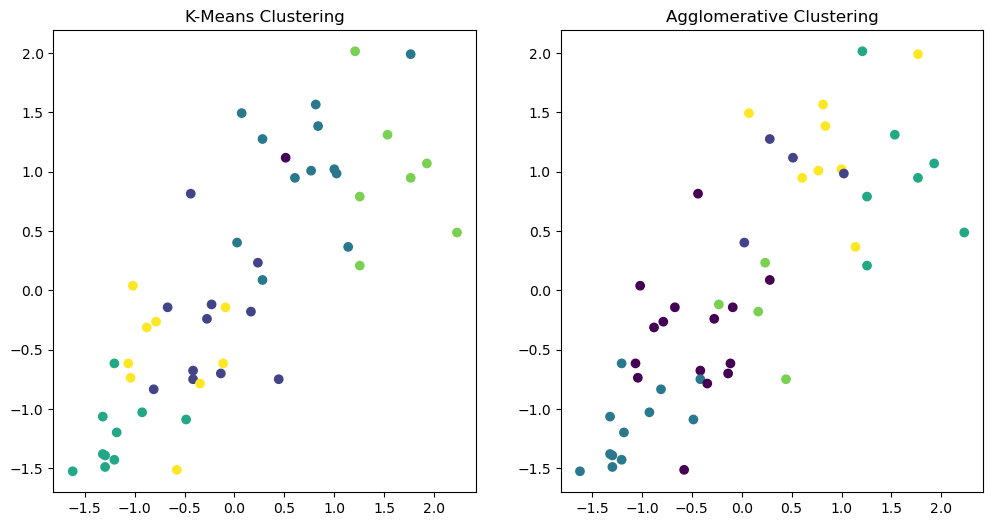

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.subplot(1,2,2)
plt.scatter(x[:, 0], x[:, 1], c=y_agg, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [16]:
x.shape

(50, 4)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [18]:
colors = data['UrbanPop']

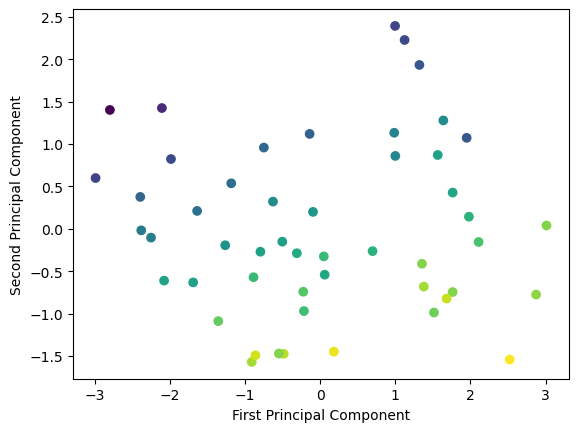

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=colors, cmap='viridis')   
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# Case study of NCI60_X Dataset

In [20]:
data1= pd.read_csv("NCI60_X.csv", index_col = 0)
data1

1         2         3         4         5             6         7  \
V1   0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
V2   0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
V3   0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
V4   0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
V5   0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   
..        ...       ...       ...       ...       ...           ...       ...   
V60 -0.030000 -0.480000  0.070000 -0.700000 -0.195000  4.100000e-01 -0.240000   
V61 -0.270000  0.630000 -0.100000  1.100000  1.045000  8.000000e-02 -0.090000   
V62  0.210000 -0.620000 -0.150000 -1.330000  0.045000 -4.000000e-01 -0.390000   
V63 -0.050000  0.140000 -0.090000 -1.260000  0.045000 -2.710505e-20  0.420000   
V64  0.350000 -0.270000  0.020000 -1.230000 -0.715000 -3.400000e-01 -0.520000   

            8         9        10  ...      6821      6822      6823  \
V1  -0.315000 -0.450000 -0.654980  ... -0.990020  0.000000  0.030000   
V2   0.724961 -0.040039 -0.285019  ... -0.270058 -0.300039 -0.250039   
V3   0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000   
V4   0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000   
V5   0.110000  0.235000  1.490019  ...  0.554980 -0.775000 -0.515000   
..        ...       ...       ...  ...       ...       ...       ...   
V60  0.105000 -0.410000  0.875019  ... -0.400019  0.150000 -0.430000   
V61 -0.675000 -0.310000  0.275019  ... -0.560020  0.200000  0.290000   
V62 -0.675000 -0.360000  0.945020  ... -0.160020 -0.120000  0.850000   
V63 -0.305000  0.310000  0.065019  ...  0.889980 -0.420000 -0.460000   
V64  0.475000  0.230000  0.915019  ...  1.629980  3.000000  2.860000   

         6824      6825      6826      6827      6828      6829      6830  
V1  -0.175000  0.629981 -0.030000  0.000000  0.280000 -0.340000 -1.930000  
V2  -0.535039  0.109941 -0.860039 -1.250049 -0.770039 -0.390039 -2.000039  
V3  -0.595000 -0.270020 -0.150000  0.000000 -0.120000 -0.410000  0.000000  
V4   0.095000 -0.350019 -0.300000 -1.150010  1.090000 -0.260000 -1.100000  
V5  -0.320000  0.634980  0.605000  0.000000  0.745000  0.425000  0.145000  
..        ...       ...       ...       ...       ...       ...       ...  
V60  0.145000 -0.090020 -0.020000 -1.390010 -1.150000  0.290000  1.190000  
V61 -0.035000  0.279981 -0.160000 -0.020010 -0.640000 -0.370000 -0.430000  
V62 -0.125000  0.779980  0.390000  0.000000  0.160000  2.030000  3.940000  
V63 -0.855000 -0.160020 -0.350000 -0.360010 -0.490000  0.010000 -1.720000  
V64  2.145000  0.869981  0.480000  0.969990  0.290000 -0.150000  1.210000  

[64 rows x 6830 columns]

In [21]:
data1.shape

(64, 6830)

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [23]:
x1 = data1

In [24]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
x1 = scaler1.fit_transform(x1)

In [25]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=4, random_state=42)
kmeans1.fit(x1)


KMeans(n_clusters=4, random_state=42)

In [26]:
y_kmeans1 = kmeans1.predict(x1)

In [27]:
from sklearn.cluster import AgglomerativeClustering
agg1 = AgglomerativeClustering(n_clusters=4)
y_agg1 = agg1.fit_predict(x1)

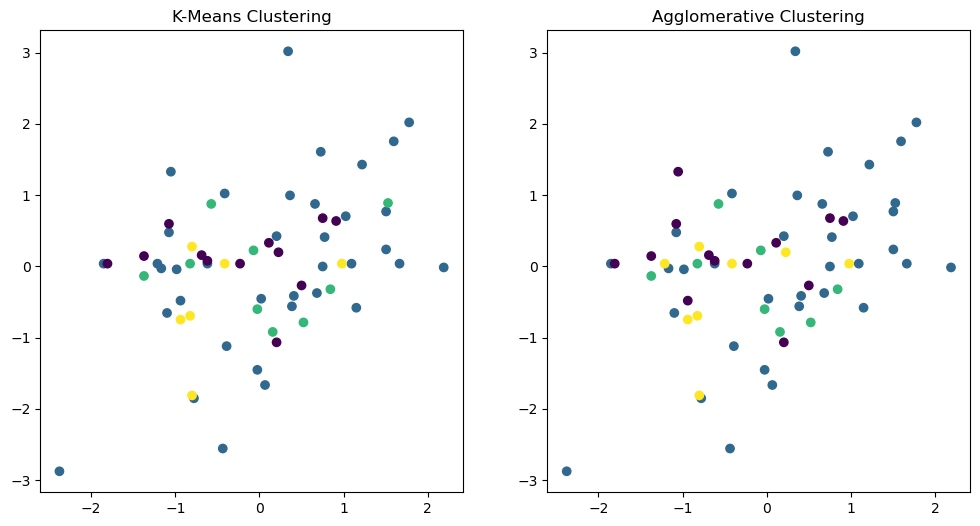

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x1[:, 0], x1[:, 1], c=y_kmeans1, cmap='viridis')
plt.title('K-Means Clustering')
plt.subplot(1,2,2)
plt.scatter(x1[:, 0], x1[:, 1], c=y_agg1, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [29]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=25)
x_pca = pca1.fit_transform(x1)

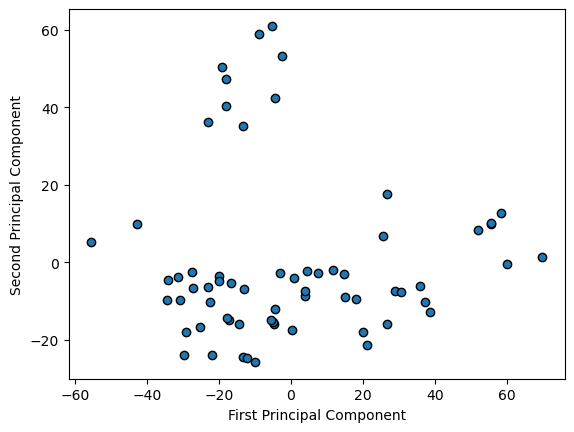

In [30]:
plt.scatter(x_pca[:, 0], x_pca[:, 1],edgecolors='k', cmap='viridis')   
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [31]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca.fit(x_pca)

KMeans(n_clusters=4)

In [32]:
y_km = kmc_pca.predict(x_pca)

In [33]:
agg_pca = AgglomerativeClustering(n_clusters=4)
y_ag = agg_pca.fit_predict(x_pca)

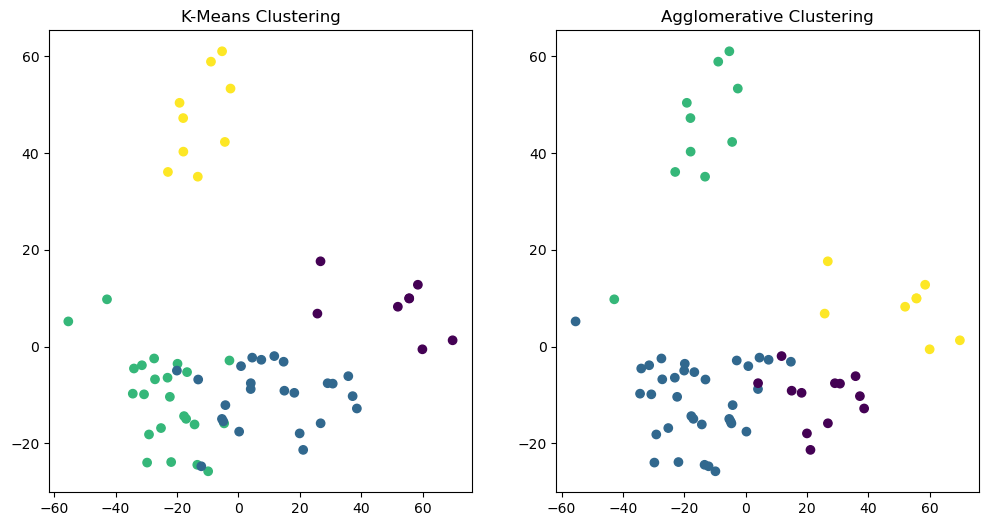

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_km, cmap='viridis')
plt.title('K-Means Clustering')
plt.subplot(1,2,2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_ag, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()
